### Step 2 - Exploratory Data Analysis!

1. Most published chef per year
2. Most popular category per year
3. Most popular recipes (number of sharing!)

In [1]:
import pandas as pd
import os
import numpy as np
import glob

import nltk
import re
import string
from nltk.tokenize import RegexpTokenizer  
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize

In [ ]:
#pd.set_option('display.max_rows', 300) # specifies number of rows to show
# specifies default number format to 4 decimal places
#pd.options.display.float_format = '{:40,.2f}'.format 
#pd.options.display.max_colwidth
#pd.options.display.max_colwidth = 1500

In [2]:
# Open the clean data file
data = pd.read_csv('guardian_clean_data.csv')

In [3]:
# Drop the column that we don't need
#data = data.drop(columns=['Unnamed: 0'])
data.head(2)

,date,headline_list,category,author,subtitle,article_content,comments_number,share_number,url,year,...,day,clean_headline_list,nostop_words_clean_headline_list,token_headline_list,clean_subtitle,nostop_words_clean_subtitle,token_subtitle,clean_article_content,nostop_words_clean_article_content,token_article_content
0,2008-10-18,Good fast food,Cooking for kids,none,It's that familiar scene: hardly any food in t...,Stringy stretchy omelettes\nEggs are obviously...,No Comments,0,https://www.theguardian.com/lifeandstyle/2008/...,2008,...,18,good fast food,good fast food,"['good', 'fast', 'food']",its that familiar scene hardly any food in the...,familiar scene hardly food house gaggle hungry...,"['familiar', 'scene', 'hardly', 'food', 'house...",stringy stretchy omelettes eggs are obviously ...,stringy stretchy omelettes eggs obviously sent...,"['stringy', 'stretchy', 'omelettes', 'eggs', '..."
1,2008-10-18,Top 10,Cooking for kids,none,Sandwich fillings,1 Cheese and tomato\n2 Apple slaw: mix mayonna...,No Comments,0,https://www.theguardian.com/lifeandstyle/2008/...,2008,...,18,top 10,top,['top'],sandwich fillings,sandwich fillings,"['sandwich', 'fillings']",1 cheese and tomato 2 apple slaw mix mayonnais...,cheese tomato apple slaw mix mayonnaise lemo...,"['cheese', 'tomato', 'apple', 'slaw', 'mix', '..."


### Number recipes per year and per month
Count of recipes published per year and per month !

In [4]:
# Create a subset of the datatable with only few information!
df = data[['year','month','author','category','headline_list']]

# count the number of recipes per year and per month!
df['count_year'] = df.groupby('year')['year'].transform('count')
df['count_month'] = df.groupby('month')['month'].transform('count')

/Users/audevuilliomenet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/audevuilliomenet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
# Create a dataframe that count the year
year_df = df.groupby('year').count().reset_index()
year_df = year_df[['year','count_year']]

# Create a dataframe that count the month
month_df = df.groupby('month').count().reset_index()
month_df = month_df[['month','count_month']]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='darkgrid')

[Text(0, 0.5, 'Number recipes'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Number recipes published per year')]

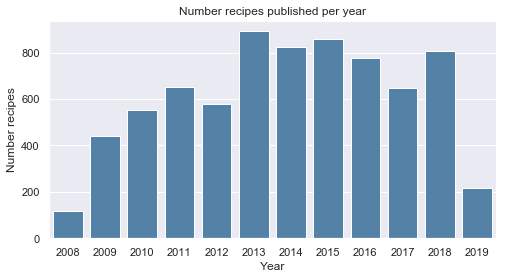

In [7]:
# Graph for the number or recipes published for each year (data in the dataset!)
x = df['year']
y = df['count_year']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

sns.barplot(x,y,color="steelblue")
ax.set(xlabel='Year',ylabel='Number recipes',title='Number recipes published per year')

[Text(0, 0.5, 'Number recipes'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Number recipes published for each month')]

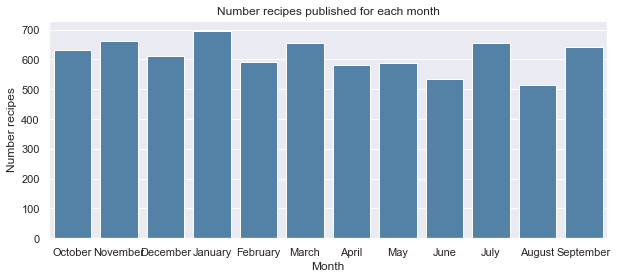

In [8]:
# Graph for the number or recipes published for each year (data in the dataset!)
x = df['month']
y = df['count_month']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

sns.barplot(x,y,color="steelblue")
ax.set(xlabel='Month',ylabel='Number recipes',title='Number recipes published for each month')

### Most popular chefs per year
Highest count of recipes published!

In [9]:
# Groupby Year and authors! # Add the count number to the column in the dataframe!
data['year_author_count'] = data.groupby(['year','author'])['year'].transform('count')

# 1. Sort the values per year and number of recipes published
top_chef = data.sort_values(['year','year_author_count'],ascending=False)
# 2. Drop duplicates and reset the index
top_chef = top_chef.drop_duplicates(['author','year'], keep='first').reset_index()
# 3. If author is none disregard it
top_chef = top_chef[top_chef['author'] != 'none']
# 4. Delet the old index column
top_chef = top_chef.drop(columns={'index'})
# 5. Selection only the 5 first chefs for each year!
most_popular_chefs = top_chef.groupby('year').head()
most_popular_chefs = most_popular_chefs[['author','category','year','headline_list','year_author_count','url']]

In [10]:
most_popular_chefs.head(2)

,author,category,year,headline_list,year_author_count,url
0,Nigel Slater,Nigel Slater's midweek dinner,2019,Nigel Slater’s chicken schnitzel recipe,28,https://www.theguardian.com/food/2019/jan/01/n...
1,Tom Hunt,Waste not,2019,Don't throw out those avocado stones: add them...,16,https://www.theguardian.com/food/2019/jan/05/a...


In [11]:
# Save Dataframe to .csv file
# Stack Bar Chart Analysis Google Datastudio
most_popular_chefs.to_csv('most_popular_chefs.csv')

### Most popular categories per year
Highest count of recipes published!

In [12]:
# Groupby Year and authors! # Add the count number to the column in the dataframe!
data['year_category_count'] = data.groupby(['year','category'])['year'].transform('count')

# 1. Sort the values per year and number of recipes published
top_category = data.sort_values(['year','year_category_count'],ascending=False)
# 2. Drop duplicates and reset the index
top_category = top_category.drop_duplicates(['category','year'], keep='first').reset_index()
# 3. If author is none disregard it
top_category = top_category[top_category['category'] != 'none']
# 4. Delet the old index column
top_category = top_category.drop(columns={'index'})
# 5. Selection only the 5 first chefs for each year!
most_popular_categories = top_category.groupby('year').head(10)
most_popular_categories = most_popular_categories[['category','author','year','headline_list','year_category_count','url']]

In [13]:
most_popular_categories.head(2)

,category,author,year,headline_list,year_category_count,url
0,Four favourite recipes,Alastair Little,2019,Alastair Little's recipes for four winter soups,18,https://www.theguardian.com/food/2019/jan/05/f...
1,Nigel Slater recipes,Nigel Slater,2019,Nigel Slater’s satisfying pie recipes for the ...,16,https://www.theguardian.com/food/2019/jan/06/n...


In [14]:
# Save Dataframe to .csv file
# Stack Bar Chart Analysis Google Datastudio
most_popular_categories.to_csv('most_popular_categories.csv')

### Chefs contribution to each category
Which chef has contribute to which category?

In [15]:
# Create a list that contains all possible categories!
category_list = []
for i in data.category:
    if i not in category_list:
        category_list.append(i)

In [16]:
category_authors_list = []

for i in category_list:
    
    filterdata_category = data.loc[data['category']==i]
    #Find all the chefs in each category
    filterdata_category['category_count_authors'] = filterdata_category.groupby(['category','author'])['author'].transform('count')
    filterdata_category = filterdata_category.sort_values(['category','author'],ascending=False)
    #filterdata_category['category_count_authors'] = filterdata_category.groupby(['category','author']).transform('count')
    # Drop duplicates (author, category)
    category_authors = filterdata_category.drop_duplicates(subset=['author','category'], keep='first')
    # Disregard author = none and keep only the author name and category
    category_authors = category_authors[category_authors['author'] != 'none']
    category_authors = category_authors[['author','category','category_count_authors']]
    # Append each category_authors to list result
    category_authors_list.append(category_authors)
    # Append lists results to one big dataframe!
    category_authors_df = pd.concat(category_authors_list)
    
    category_authors_df = category_authors_df.reset_index()  

/Users/audevuilliomenet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
category_authors_df = category_authors_df.drop(columns={'index'})

In [18]:
category_authors_df.head(3)

,author,category,category_count_authors
0,Jane Brocket,Cooking for kids,1
1,Claire Thomson,Cooking for kids,71
2,Charlotte Hume,Cooking for kids,1


In [19]:
# Save Dataframe to .csv file
# Stack Bar Chart Analysis Google Datastudio
category_authors_df.to_csv('category_authors_contribution.csv')

### Look at the recipes for Festivities

In [20]:
# Create a new column in the dataframe for the festivities.
data['festivities'] = 'other'
# Create a list of the main festivities in through the year. 
festivities = ['easter','christmas','halloween']

In [21]:
#Create a function that loop through the festivities list and look if the published recipes mentioned one of the festivities.  
def FeastClass(recipe, Feasts):
    # get the name of the festivity
    for festivity in Feasts:
        #check if festivity is in recipe subtitle!
        if festivity in recipe:
            return festivity
        else:
            continue
        return False

In [22]:
# Loop through all the recipes Subtitle and find the one that mention a festivity!
for festivity in data.token_subtitle:
    if (FeastClass(festivity, festivities) == 'easter'):
        feastclass = 'easter'
        data.loc[data['token_subtitle']== festivity,'festivities'] = feastclass
    elif (FeastClass(festivity, festivities) == 'christmas'):
        feastclass = 'christmas'
        data.loc[data['token_subtitle']== festivity,'festivities'] = feastclass
    elif (FeastClass(festivity, festivities) == 'halloween'):
        feastclass = 'halloween'
        data.loc[data['token_subtitle']== festivity,'festivities'] = feastclass

In [23]:
# Check if this has been done correctly! 
data[['token_subtitle','festivities']][3130:3134]

,token_subtitle,festivities
3130,"['fed', 'turkey', 'running', 'daily', 'site', ...",christmas
3131,"['green', 'smoothie', 'combining', 'young', 'c...",other
3132,"['hit', 'kitchen', 'thanks', 'pungent', 'kick'...",other
3133,"['second', 'ofms', 'turkeyfree', 'options', 'b...",christmas


In [24]:
# Select a subset of the dataframe and calculate count for each year, each month
df_feast = data[['festivities','year','month']]
df_feast = df_feast[df_feast['festivities'] != 'other']

df_feast['count_festivities_year'] = df_feast.groupby(['year','festivities'])['year'].transform('count')
df_feast['count_festivities_month'] = df_feast.groupby(['month','festivities'])['month'].transform('count')

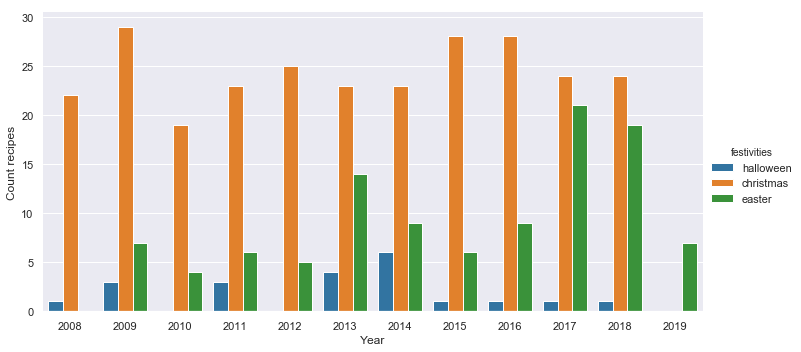

In [25]:
# Draw a nested barplot to show festivities for each year
g = sns.catplot(x='year', y='count_festivities_year', hue='festivities', data=df_feast, kind='bar',
                aspect=2,palette='tab10')
g.despine(left=True)
g.set_ylabels('Count recipes')
g.set_xlabels('Year')

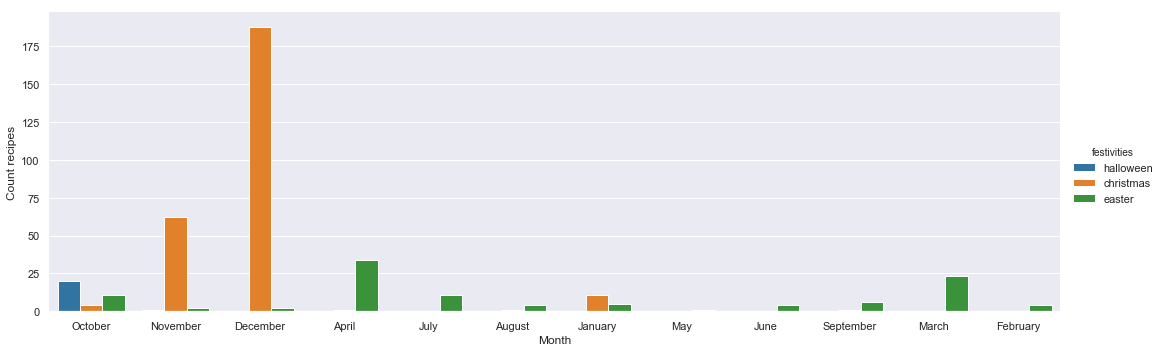

In [29]:
# Draw a nested barplot to show festivities for each year
g = sns.catplot(x='month', y='count_festivities_month', hue='festivities', data=df_feast, kind='bar',
                aspect=3,palette='tab10')
g.despine(left=True)
g.set_ylabels('Count recipes')
g.set_xlabels('Month')

In [30]:
# Create a dataframe that count the festivities per year
year_df_feast = df_feast.groupby(['year','festivities']).count().reset_index()
year_df_feast = year_df_feast[['year','count_festivities_year','festivities']]

# Create a dataframe that count the festivities per month
month_df_feast = df_feast.groupby(['month','festivities']).count().reset_index()
month_df_feast = month_df_feast[['month','count_festivities_month','festivities']]

In [31]:
# Save Dataframes to .csv file
# Stack Bar Chart Analysis Google Datastudio
month_df_feast.to_csv('month_df_feast.csv')
year_df_feast.to_csv('year_df_feast.csv')